In [2]:
import gym
import numpy as np
import random
import math # to use epsilon decay
# Potentially: from IPython.display import clear_output # To clear output during training loops
# Potentially: import matplotlib.pyplot as plt # For plotting rewards

In [3]:
env = gym.make("Taxi-v3")

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [6]:
#intialize Q table , empty numpy array with states and actions
num_states=env.observation_space.n
num_actions=env.action_space.n
q_table=np.zeros((num_states,num_actions))
print("Actions: 0=South, 1=North, 2=East, 3=West, 4=Pickup, 5=Dropoff")


Actions: 0=South, 1=North, 2=East, 3=West, 4=Pickup, 5=Dropoff


In [8]:
#hyperparameters
learning_rate = 0.1  # Alpha
discount_factor = 0.99 # Gamma

epsilon = 1.0  # Initial exploration rate
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005 #have to

num_episodes = 25000



In [17]:
rewards_all_episodes = []  # Store rewards for plotting learning curve

for episode in range(num_episodes):
    # Reset environment for new episode
    state = env.reset()  # Get initial state
    done = False
    current_episode_reward = 0

    while not done:
        # STEP 1: EXPLORATION vs EXPLOITATION (Epsilon-greedy strategy)
        # Generate random number between 0 and 1
        exploration_threshold = random.uniform(0, 1)

        if exploration_threshold > epsilon:
            # EXPLOITATION: choose action with highest q-value for current state
            action = np.argmax(q_table[state, :])
        else:
            # EXPLORATION: choose random action
            action = env.action_space.sample()

        # STEP 2: take action and observe results
        #print(env.step(action))
        next_state, reward, done, info = env.step(action)

        # STEP 3: UPDATE Q-TABLE using Bellman equation
        # Q(s,a) = Q(s,a) + α[r + γ * max(Q(s',a')) - Q(s,a)]

        if done:
            # If episode is finished, there's no future reward
            # Q(s,a) = Q(s,a) + α[r + 0 - Q(s,a)]
            q_table[state, action] = q_table[state, action] + learning_rate * (
                reward - q_table[state, action]
            )
        else:
            # Normal Q-value update with future reward consideration
            # Q(s,a) = Q(s,a) + α[r + γ * max(Q(s',a')) - Q(s,a)]
            q_table[state, action] = q_table[state, action] + learning_rate * (
                reward + discount_factor * np.max(q_table[next_state, :]) - q_table[state, action]
            )

        # STEP 4: UPDATE STATE and accumulate reward
        state = next_state
        current_episode_reward += reward

    # STEP 5: DECAY EPSILON after each episode
    # Gradually reduce exploration as agent learns
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * math.exp(-epsilon_decay_rate * episode)

    # Store episode reward for analysis
    rewards_all_episodes.append(current_episode_reward)

    # Print progress every 1000 episodes
    if (episode + 1) % 1000 == 0:
        #clear_output(wait=True)
        avg_reward = np.mean(rewards_all_episodes[-1000:])  # Average of last 1000 episodes
        print(f"Episode: {episode + 1}/{num_episodes}")
        print(f"Epsilon: {epsilon:.3f}")
        print(f"Average reward (last 1000 episodes): {avg_reward:.2f}")
        print(f"Current episode reward: {current_episode_reward}")
        print("-" * 50)

print("Training finished!")

Streaming output truncated to the last 5000 lines.
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environment now!!
resetting the environ

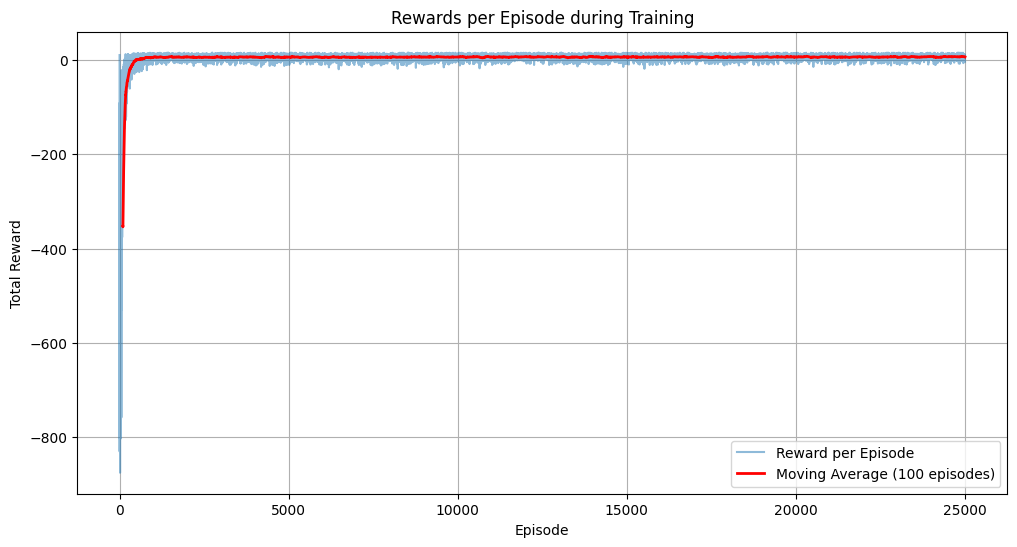

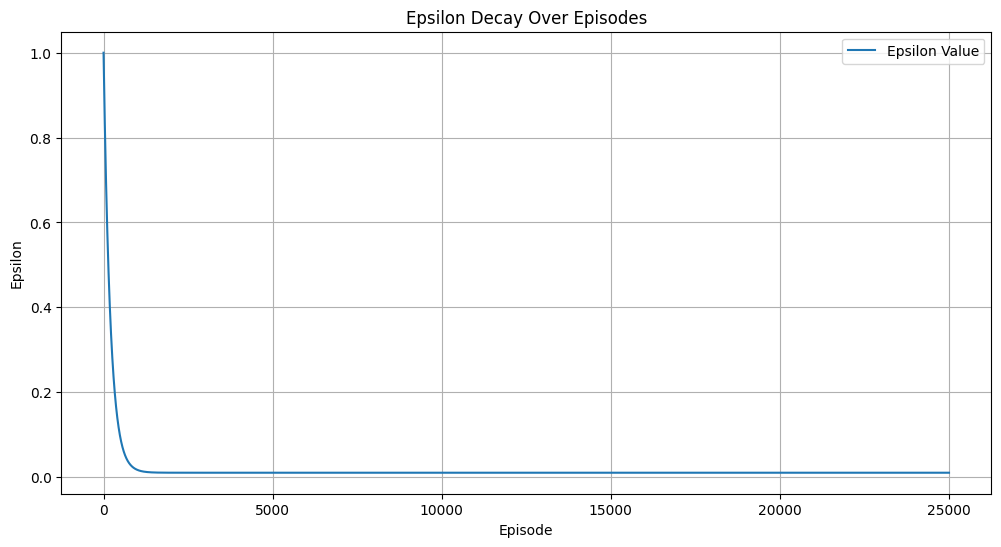

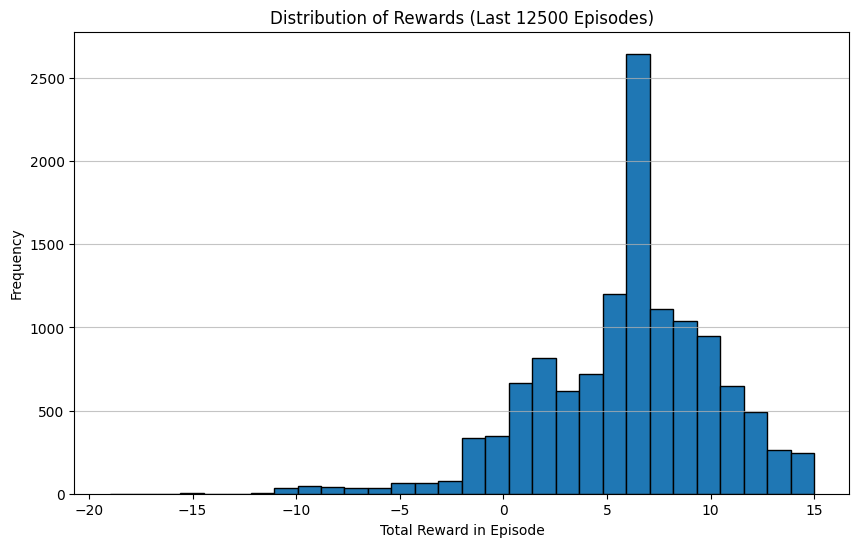

Number of episodes plotted: 25000
Final moving average reward (last 100 episodes of the moving average): 6.15

Summary Statistics for All Episodes:
Average reward: 3.95
Standard deviation of reward: 28.57
Max reward: 15.00
Min reward: -875.00

Summary Statistics for Last 10% of Episodes (2500 episodes):
Average reward: 6.26
Standard deviation of reward: 4.22
Max reward: 15.00
Min reward: -12.00


In [19]:
import matplotlib.pyplot as plt

# Calculate a moving average of rewards to smooth out the curve
# This makes it easier to see trends.
window_size = 100 # Plot average reward over this many episodes
if len(rewards_all_episodes) >= window_size:
    moving_avg_rewards = np.convolve(rewards_all_episodes, np.ones(window_size)/window_size, mode='valid')
else:
    # Handle cases where there are fewer episodes than the window size
    # For simplicity, we can just plot the raw rewards or a smaller window
    moving_avg_rewards = rewards_all_episodes
    print(f"Warning: Fewer episodes ({len(rewards_all_episodes)}) than moving average window ({window_size}). Plotting raw or partially averaged rewards.")


# 1. Plot of Rewards per Episode (with Moving Average)
plt.figure(figsize=(12, 6))
plt.plot(rewards_all_episodes, label='Reward per Episode', alpha=0.5) # Raw rewards
if len(moving_avg_rewards) > 0: # Ensure moving_avg_rewards is not empty
    # Adjust x-axis for moving average to align it properly
    # The moving average starts after 'window_size - 1' episodes
    plt.plot(np.arange(window_size -1, len(rewards_all_episodes)), moving_avg_rewards, label=f'Moving Average ({window_size} episodes)', color='red', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Rewards per Episode during Training')
plt.legend()
plt.grid(True)
plt.show()

# 2. Plot of Epsilon Decay (Optional, but good for sanity check)
plt.figure(figsize=(12, 6))
epsilon_values_over_episodes = [min_epsilon + (max_epsilon - min_epsilon) * math.exp(-epsilon_decay_rate * ep) for ep in range(num_episodes)]
plt.plot(epsilon_values_over_episodes, label='Epsilon Value')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.title('Epsilon Decay Over Episodes')
plt.legend()
plt.grid(True)
plt.show()

# 3. Distribution of Final Rewards (Histogram)
# This can give you an idea of the consistency of the agent's performance
# especially towards the end of training.
plt.figure(figsize=(10, 6))
# Consider plotting rewards from the latter half of training for a more stable view
num_episodes_for_hist = len(rewards_all_episodes) // 2
plt.hist(rewards_all_episodes[-num_episodes_for_hist:], bins=30, edgecolor='black')
plt.xlabel('Total Reward in Episode')
plt.ylabel('Frequency')
plt.title(f'Distribution of Rewards (Last {num_episodes_for_hist} Episodes)')
plt.grid(axis='y', alpha=0.75)
plt.show()

print(f"Number of episodes plotted: {len(rewards_all_episodes)}")
if len(moving_avg_rewards) > 0:
    print(f"Final moving average reward (last {window_size} episodes of the moving average): {moving_avg_rewards[-1]:.2f}")
else:
    print("Not enough data for final moving average reward.")

# You can also print some summary statistics
print(f"\nSummary Statistics for All Episodes:")
print(f"Average reward: {np.mean(rewards_all_episodes):.2f}")
print(f"Standard deviation of reward: {np.std(rewards_all_episodes):.2f}")
print(f"Max reward: {np.max(rewards_all_episodes):.2f}")
print(f"Min reward: {np.min(rewards_all_episodes):.2f}")

# Statistics for the latter part of training (e.g., last 10% of episodes)
last_10_percent_idx = int(len(rewards_all_episodes) * 0.9)
if last_10_percent_idx < len(rewards_all_episodes): # Ensure there are enough episodes
    rewards_last_10_percent = rewards_all_episodes[last_10_percent_idx:]
    print(f"\nSummary Statistics for Last 10% of Episodes ({len(rewards_last_10_percent)} episodes):")
    print(f"Average reward: {np.mean(rewards_last_10_percent):.2f}")
    print(f"Standard deviation of reward: {np.std(rewards_last_10_percent):.2f}")
    print(f"Max reward: {np.max(rewards_last_10_percent):.2f}")
    print(f"Min reward: {np.min(rewards_last_10_percent):.2f}")

In [20]:
final_avg_reward = np.mean(rewards_all_episodes[-1000:])
print(f"\nTraining Summary:")
print(f"Final epsilon: {epsilon:.3f}")
print(f"Average reward (last 1000 episodes): {final_avg_reward:.2f}")
print(f"Total episodes: {len(rewards_all_episodes)}")

# Display some Q-table statistics
print(f"\nQ-table Statistics:")
print(f"Non-zero Q-values: {np.count_nonzero(q_table)}/{q_table.size}")
print(f"Max Q-value: {np.max(q_table):.2f}")
print(f"Min Q-value: {np.min(q_table):.2f}")
print(f"Mean Q-value: {np.mean(q_table):.2f}")


Training Summary:
Final epsilon: 0.010
Average reward (last 1000 episodes): 6.30
Total episodes: 25000

Q-table Statistics:
Non-zero Q-values: 2760/3000
Max Q-value: 20.00
Min Q-value: -45.78
Mean Q-value: -12.91


In [21]:
# --- EVALUATION OF THE TRAINED AGENT ---

num_evaluation_episodes = 100
total_rewards_eval = 0
total_steps_eval = 0
successful_deliveries = 0

print("\n--- Starting Evaluation ---")

for episode in range(num_evaluation_episodes):
    state = env.reset()
    done = False
    episode_reward = 0
    episode_steps = 0

    while not done:
        # Choose action based purely on learned Q-values (exploitation)
        action = np.argmax(q_table[state, :])

        next_state, reward, done, info = env.step(action)

        state = next_state
        episode_reward += reward
        episode_steps += 1

        if done:
            if reward == 20: # Standard reward for successful drop-off in Taxi-v3
                successful_deliveries += 1
            break # Exit while loop for this episode

    total_rewards_eval += episode_reward
    total_steps_eval += episode_steps

    if (episode + 1) % 10 == 0:
        print(f"Evaluation Episode: {episode + 1}/{num_evaluation_episodes} | Reward: {episode_reward} | Steps: {episode_steps}")

# Calculate average statistics
avg_reward_eval = total_rewards_eval / num_evaluation_episodes
avg_steps_eval = total_steps_eval / num_evaluation_episodes
success_rate_eval = (successful_deliveries / num_evaluation_episodes) * 100

print("\n--- Evaluation Finished ---")
print(f"Total Episodes Evaluated: {num_evaluation_episodes}")
print(f"Average Reward per Episode: {avg_reward_eval:.2f}")
print(f"Average Steps per Episode: {avg_steps_eval:.2f}")
print(f"Success Rate (successful deliveries): {success_rate_eval:.2f}%")

# Compare with training performance (last 10% of training)
if 'rewards_last_10_percent' in locals() and len(rewards_last_10_percent) > 0:
    print(f"\nFor comparison (last 10% of training):")
    print(f"  Average reward: {np.mean(rewards_last_10_percent):.2f}")
else:
    print("\n(Training statistics for comparison not available in this session(run training cell again))")


--- Starting Evaluation ---
Evaluation Episode: 10/100 | Reward: 7 | Steps: 14
Evaluation Episode: 20/100 | Reward: 9 | Steps: 12
Evaluation Episode: 30/100 | Reward: 13 | Steps: 8
Evaluation Episode: 40/100 | Reward: 1 | Steps: 20
Evaluation Episode: 50/100 | Reward: 5 | Steps: 16
Evaluation Episode: 60/100 | Reward: 5 | Steps: 16
Evaluation Episode: 70/100 | Reward: 4 | Steps: 17
Evaluation Episode: 80/100 | Reward: 10 | Steps: 11
Evaluation Episode: 90/100 | Reward: 3 | Steps: 18
Evaluation Episode: 100/100 | Reward: 11 | Steps: 10

--- Evaluation Finished ---
Total Episodes Evaluated: 100
Average Reward per Episode: 6.37
Average Steps per Episode: 14.63
Success Rate (successful deliveries): 100.00%

For comparison (last 10% of training):
  Average reward: 6.26


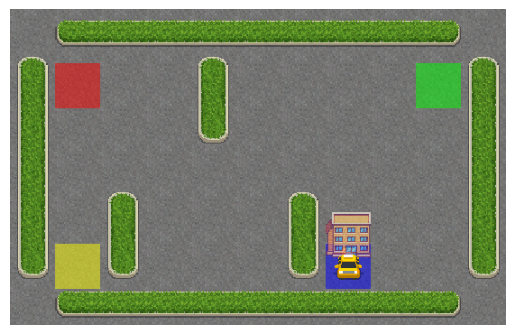

Episode Finished after 21 steps!
Final Reward for this episode: 0
Passenger delivered successfully!


In [ ]:
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

#trying to visualize with trained parameters

print("\n--- Visualizing One Episode ---")
state = env.reset()
done = False
max_steps_visualization = 50 # Set a max steps to prevent infinite loop if something is wrong
total_episode_reward_viz = 0


# env.render(mode='human') would open a window, if running in local system

for step_viz in range(max_steps_visualization):
    clear_output(wait=True) # to cllear the previous frame

    try:
        rendered_frame = env.render(mode='rgb_array')
        if rendered_frame is not None:
            plt.imshow(rendered_frame)
            plt.axis('off') # Turn off axis numbers and ticks
            plt.show()
        else:
            #fallback if it doesnot render This just prints text representation
            print(f"Step: {step_viz + 1}")
            env.render(mode='ansi') # Renders text-based to console output

    except Exception as e:
        print(f"Rendering error: {e}. Falling back to ANSI render.")
        env.render(mode='ansi')


    print(f"Current State: {state}, Total Reward: {total_episode_reward_viz}")

    # whichever action has max Q value we choose it
    action = np.argmax(q_table[state, :])

    next_state, reward, done, info = env.step(action)

    state = next_state
    total_episode_reward_viz += reward

    time.sleep(0.5) # Pausing here for 1/2 second to see frame

    if done:
        clear_output(wait=True)
        try:
            rendered_frame = env.render(mode='rgb_array')
            if rendered_frame is not None:
                plt.imshow(rendered_frame)
                plt.axis('off')
                plt.show()
            else:
                env.render(mode='ansi')
        except Exception as e:
            print(f"Rendering error on final step: {e}. Falling back to ANSI render.")
            env.render(mode='ansi')

        print(f"Episode Finished after {step_viz + 1} steps!")
        print(f"Final Reward for this episode: {total_episode_reward_viz}")
        if reward == 20:
            print("Passenger delivered successfully!")
        else:
            print("Episode ended for other reasons (e.g., max steps in a real scenario, or unexpected outcome).")
        break

if not done:
    print("Visualization stopped due to max_steps_visualization limit.")
#this example has 0 rewards because it took long path to reach , this can probably considered as scenario where agent did not learn well enough and hyperparameters need tuning.
# env.close() # Important if you used mode='human' or if render creates resources.
# For 'rgb_array' and 'ansi' it's often not strictly necessary but good practice.